# ✏️ Esercizi {#e-cfa-1}

In [24]:
here::here("code", "_common.R") |> source()

# Load packages
if (!requireNamespace("pacman")) install.packages("pacman")
pacman::p_load(
    lavaan, psych, semTools, BifactorIndicesCalculator, semPlot, stringr, paran,
    lsr, car, pROC, graphics, qgraph, effectsize, reportROC, GPArotation
)

## Introduzione

In questo esercizio replicheremo la validazione della *Strengths and Weaknesses
of ADHD Symptoms and Normal Behavior Scale* descritta nell'articolo di @blume2020validation. 

Gli adulti con sintomi di disturbo da deficit di attenzione/iperattività (ADHD; American Psychiatric Association [APA], 2013) presentano sintomi di disattenzione (ad esempio, difficoltà a mantenere l’attenzione sul lavoro, durante compiti o attività), iperattività-impulsività (ad esempio, interrompere o intromettersi nelle conversazioni, parlare in modo eccessivo), o una combinazione di entrambi. Questi sintomi sono associati a compromissioni nel funzionamento accademico (ad esempio, tassi più bassi di diploma e laurea), lavorativo (ad esempio, redditi complessivamente inferiori) e sociale (ad esempio, meno amici, tassi di divorzio più alti). 

L'ADHD si manifesta inizialmente durante l’infanzia e persiste nell’età adulta in circa la metà dei casi, con una prevalenza stimata del 2.5% negli adulti. Clinicamente, l'ADHD si presenta in tre modalità principali:

- **Presentazione prevalentemente disattenta**: predominano i sintomi di disattenzione;
- **Presentazione prevalentemente iperattiva-impulsiva**: predominano i sintomi di iperattività-impulsività;
- **Presentazione combinata**: sono presenti livelli significativi di entrambi i tipi di sintomi.

Swanson e colleghi (2012) hanno introdotto la scala *Strengths and Weaknesses of ADHD-Symptoms and Normal-Behavior* (SWAN), che valuta i sintomi di disattenzione e iperattività-impulsività nei bambini in età scolare tramite un report di terze parti. La scala, composta da 18 item, si basa sui criteri sintomatici definiti nel *Diagnostic and Statistical Manual of Mental Disorders* (DSM-IV; APA, 2000) e confermati nel DSM-5 (APA, 2013). La SWAN è stata progettata per valutare il comportamento dei bambini, concentrandosi su situazioni scolastiche, di gioco e domestiche. La scala utilizza un punteggio a 7 punti, con ancore che rappresentano gli estremi negativi ("molto al di sotto della media") e positivi ("molto al di sopra della media"), confrontando il comportamento del bambino con quello di altri coetanei. La SWAN è stata la prima scala a valutare i sintomi dell'ADHD in modo realmente dimensionale.

@blume2020validation adattano la versione tedesca esistente, SWAN-DE (Schulz-Zhecheva et al., 2019), in una versione self-report per adulti, denominandola *German Strengths and Weaknesses of ADHD and Normal-Behavior Scale Self-Report* (SWAN-DE-SB).

## Validazione

Di seguito è fornita una parte dello script R fornito dagli autori per l'analisi statistica dai dati grezzi fino alla formulazione del modello bifattoriale.

In [11]:
data <- rio::import(here::here("data", "blume_2024", "data_total_OSF.csv"))

data$X <- NULL # delete column without information

data$SW_mean <- as.numeric(data$SW_mean) # convert from character to numeric
data$SW_AD_mean <- as.numeric(data$SW_AD_mean)
data$SW_HI_mean <- as.numeric(data$SW_HI_mean)

data$CA_mean <- as.numeric(data$CA_mean)
data$CA_AD_mean <- as.numeric(data$CA_AD_mean)
data$CA_HI_mean <- as.numeric(data$CA_HI_mean)

data$HA_mean <- as.numeric(data$HA_mean)
data$HA_AD_mean <- as.numeric(data$HA_AD_mean)
data$HA_HI_mean <- as.numeric(data$HA_HI_mean)

In [12]:
data_clin <- rio::import(here::here("data", "blume_2024", "data_clinical_OSF.csv"))

data_clin$X <- NULL # delete column without information

data_clin$SW_mean <- as.numeric(data_clin$SW_mean) # convert from character to numeric
data_clin$SW_AD_mean <- as.numeric(data_clin$SW_AD_mean)
data_clin$SW_HI_mean <- as.numeric(data_clin$SW_HI_mean)

data_clin$CA_mean <- as.numeric(data_clin$CA_mean)
data_clin$CA_AD_mean <- as.numeric(data_clin$CA_AD_mean)
data_clin$CA_HI_mean <- as.numeric(data_clin$CA_HI_mean)

data_clin$HA_mean <- as.numeric(data_clin$HA_mean)
data_clin$HA_AD_mean <- as.numeric(data_clin$HA_AD_mean)
data_clin$HA_HI_mean <- as.numeric(data_clin$HA_HI_mean)

In [13]:
# Information on missing data in the general population sample
SWAN_vars <- colnames(data)[str_detect(colnames(data), "SW01")]
sum(is.na(data[, SWAN_vars])) # 1 data point missing
sum(!is.na(data[, SWAN_vars])) # 7163 not missing -> 0.01% missing

[1] 1

[1] 7163

In [17]:
# age

sem_age1 <- "
        SW_GF =~ SW01_01 + SW01_02 + SW01_03 + SW01_04 + SW01_05 + SW01_06
                           + SW01_07 + SW01_08 + SW01_09 + SW01_10 + SW01_11 + SW01_12
                           + SW01_13 + SW01_14 + SW01_15 + SW01_16 + SW01_17 + SW01_18;
        SW_GF ~ age
"
fit_age1 <- sem(sem_age1, data = data)

# Regressions:
#                   Estimate  Std.Err  z-value  P(>|z|)
#  SW_GF ~
#    age               0.001    0.003    0.285    0.775


sem_age2 <- "
        SW_AD =~ SW01_01 + SW01_02 + SW01_03 + SW01_04 + SW01_05 + SW01_06
                + SW01_07 + SW01_08 + SW01_09;
        SW_AD ~ age
"
fit_age2 <- sem(sem_age2, data = data)

# Regressions:
#                   Estimate  Std.Err  z-value  P(>|z|)
#  SW_AD ~
#    age               0.004    0.003    1.018    0.309

sem_age3 <- "
        SW_HI =~ SW01_10 + SW01_11 + SW01_12 + SW01_13 + SW01_14 + SW01_15
                + SW01_16 + SW01_17 + SW01_18;
        SW_HI ~ age
"
fit_age3 <- sem(sem_age3, data = data)

# Regressions:
#                   Estimate  Std.Err  z-value  P(>|z|)
#  SW_HI ~
#    age              -0.002    0.005   -0.530    0.596

In [19]:
glimpse(data)

Rows: 398
Columns: 84
$ V1             <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ~
$ id             <int> 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,~
$ gender         <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,~
$ age            <int> 36, 26, 21, 21, 21, 19, 22, 25, 28, 20, 19, 32, 18,~
$ diagnosis_ever <int> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ~
$ diagnosis_now  <int> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ~
$ medication     <int> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ~
$ education      <int> 4, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 4, 3, 3, 3, 4, 3, ~
$ SW01_01        <int> 2, 4, 4, 4, 4, 6, 4, 6, 3, 4, 5, 6, 4, 4, 3, 5, 4, ~
$ SW01_02        <int> 2, 6, 3, 3, 5, 5, 4, 4, 4, 1, 5, 5, 3, 4, 3, 5, 1, ~
$ SW01_03        <int> 4, 6, 5, 3, 4, 6, 6, 6, 5, 4, 5, 5, 5, 6, 2, 5, 4, ~
$ SW01_04        <int> 4, 6, 3, 4, 5, 6, 5, 5, 5, 3, 6, 5, 4, 5, 3, 5, 1, ~
$ SW01_05        <int> 3, 3, 5, 4, 5, 6, 6, 6, 6, 5, 4, 6, 5, 5, 6

In [21]:
# education
sem_education1 <- "
        SW_GF =~ SW01_01 + SW01_02 + SW01_03 + SW01_04 + SW01_05 + SW01_06
                           + SW01_07 + SW01_08 + SW01_09 + SW01_10 + SW01_11 + SW01_12
                           + SW01_13 + SW01_14 + SW01_15 + SW01_16 + SW01_17 + SW01_18;
        SW_GF ~ education
"
fit_education1 <- sem(sem_education1, data = data)

# Regressions:
#                   Estimate  Std.Err  z-value  P(>|z|)
#  SW_GF ~
#    education         0.170    0.059    2.897    0.004

sem_education2 <- "
        SW_AD =~ SW01_01 + SW01_02 + SW01_03 + SW01_04 + SW01_05 + SW01_06
                + SW01_07 + SW01_08 + SW01_09;
        SW_AD ~ education
"
fit_education2 <- sem(sem_education2, data = data)

# Regressions:
#                   Estimate  Std.Err  z-value  P(>|z|)
#  SW_AD ~
#    education         0.209    0.066    3.196    0.001

sem_education3 <- "
        SW_HI =~ SW01_10 + SW01_11 + SW01_12 + SW01_13 + SW01_14 + SW01_15
                + SW01_16 + SW01_17 + SW01_18;
        SW_HI ~ education
"
fit_education3 <- sem(sem_education3, data = data)

# Regressions:
#                   Estimate  Std.Err  z-value  P(>|z|)
#  SW_HI ~
#    education         0.172    0.086    2.016    0.044

# interactions

In [23]:
SWAN_vars <- colnames(data)[str_detect(colnames(data), "SW01")]

SW_AD <- colnames(data[, c(
    "SW01_01",
    "SW01_02",
    "SW01_03",
    "SW01_04",
    "SW01_05",
    "SW01_06",
    "SW01_07",
    "SW01_08",
    "SW01_09"
)])

SW_HI <- colnames(data[, c(
    "SW01_10",
    "SW01_11",
    "SW01_12",
    "SW01_13",
    "SW01_14",
    "SW01_15",
    "SW01_16",
    "SW01_17",
    "SW01_18"
)])

# Cronbachs alphas
psych::alpha(data[, SWAN_vars]) # 0.90
psych::alpha(data[, SW_AD]) # 0.85
psych::alpha(data[, SW_HI]) # 0.87


Reliability analysis   
Call: psych::alpha(x = data[, SWAN_vars])

  raw_alpha std.alpha G6(smc) average_r S/N    ase mean   sd median_r
       0.9       0.9    0.92      0.33 8.8 0.0075  3.8 0.83     0.33

    95% confidence boundaries 
         lower alpha upper
Feldt     0.88   0.9  0.91
Duhachek  0.88   0.9  0.91

 Reliability if an item is dropped:
        raw_alpha std.alpha G6(smc) average_r S/N alpha se var.r med.r
SW01_01      0.89      0.90    0.91      0.33 8.5   0.0078 0.014  0.34
SW01_02      0.89      0.89    0.91      0.32 8.1   0.0081 0.013  0.32
SW01_03      0.89      0.89    0.91      0.33 8.3   0.0080 0.014  0.32
SW01_04      0.89      0.89    0.91      0.33 8.3   0.0080 0.013  0.33
SW01_05      0.89      0.90    0.91      0.34 8.6   0.0077 0.012  0.33
SW01_06      0.89      0.89    0.91      0.33 8.5   0.0078 0.014  0.33
SW01_07      0.89      0.89    0.91      0.33 8.3   0.0080 0.013  0.33
SW01_08      0.90      0.90    0.91      0.34 8.7   0.0077 0.013  0.34
SW01


Reliability analysis   
Call: psych::alpha(x = data[, SW_AD])

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean   sd median_r
      0.85      0.85    0.85      0.38 5.5 0.012  3.8 0.92     0.38

    95% confidence boundaries 
         lower alpha upper
Feldt     0.82  0.85  0.87
Duhachek  0.82  0.85  0.87

 Reliability if an item is dropped:
        raw_alpha std.alpha G6(smc) average_r S/N alpha se  var.r med.r
SW01_01      0.84      0.84    0.83      0.39 5.1    0.012 0.0107  0.39
SW01_02      0.82      0.82    0.81      0.36 4.4    0.014 0.0094  0.33
SW01_03      0.83      0.83    0.83      0.38 5.0    0.013 0.0109  0.38
SW01_04      0.82      0.82    0.82      0.36 4.6    0.014 0.0092  0.35
SW01_05      0.83      0.83    0.82      0.38 4.9    0.013 0.0083  0.39
SW01_06      0.83      0.83    0.83      0.39 5.1    0.012 0.0104  0.39
SW01_07      0.82      0.82    0.81      0.36 4.5    0.014 0.0087  0.35
SW01_08      0.84      0.85    0.84      0.41 5.5    0.012 0.0080  0.39
S


Reliability analysis   
Call: psych::alpha(x = data[, SW_HI])

  raw_alpha std.alpha G6(smc) average_r S/N  ase mean   sd median_r
      0.87      0.87    0.87      0.43 6.7 0.01  3.8 0.97     0.42

    95% confidence boundaries 
         lower alpha upper
Feldt     0.85  0.87  0.89
Duhachek  0.85  0.87  0.89

 Reliability if an item is dropped:
        raw_alpha std.alpha G6(smc) average_r S/N alpha se  var.r med.r
SW01_10      0.86      0.86    0.86      0.43 6.0    0.011 0.0073  0.41
SW01_11      0.85      0.85    0.85      0.42 5.7    0.011 0.0059  0.41
SW01_12      0.85      0.85    0.84      0.41 5.6    0.012 0.0059  0.41
SW01_13      0.85      0.85    0.85      0.42 5.7    0.012 0.0069  0.41
SW01_14      0.86      0.86    0.86      0.44 6.3    0.011 0.0079  0.44
SW01_15      0.86      0.87    0.86      0.45 6.4    0.010 0.0065  0.44
SW01_16      0.85      0.86    0.85      0.43 6.0    0.011 0.0082  0.41
SW01_17      0.86      0.86    0.86      0.43 6.1    0.011 0.0083  0.43
SW0


Three factors are required for identification -- general factor loadings set to be equal. 
Proceed with caution. 
Think about redoing the analysis with alternative values of the 'option' setting.




Omega 
Call: omegah(m = m, nfactors = nfactors, fm = fm, key = key, flip = flip, 
    digits = digits, title = title, sl = sl, labels = labels, 
    plot = plot, n.obs = n.obs, rotate = rotate, Phi = Phi, option = option, 
    covar = covar)
Alpha:                 0.9 
G.6:                   0.92 
Omega Hierarchical:    0.58 
Omega H asymptotic:    0.63 
Omega Total            0.91 

Schmid Leiman Factor loadings greater than  0.2 
           g   F1*   F2*   h2   h2   u2   p2  com
SW01_01 0.40  0.34       0.28 0.28 0.72 0.56 2.06
SW01_02 0.54  0.50       0.55 0.55 0.45 0.53 2.03
SW01_03 0.49  0.32  0.20 0.38 0.38 0.62 0.62 2.12
SW01_04 0.50  0.54       0.54 0.54 0.46 0.46 1.99
SW01_05 0.40  0.52       0.44 0.44 0.56 0.37 1.95
SW01_06 0.41  0.36       0.30 0.30 0.70 0.55 2.05
SW01_07 0.50  0.55       0.55 0.55 0.45 0.45 1.98
SW01_08 0.34  0.27       0.20 0.20 0.80 0.59 2.08
SW01_09 0.46  0.35       0.36 0.36 0.64 0.60 2.10
SW01_10 0.51        0.36 0.43 0.43 0.57 0.61 2.11
SW01_11 0.52  

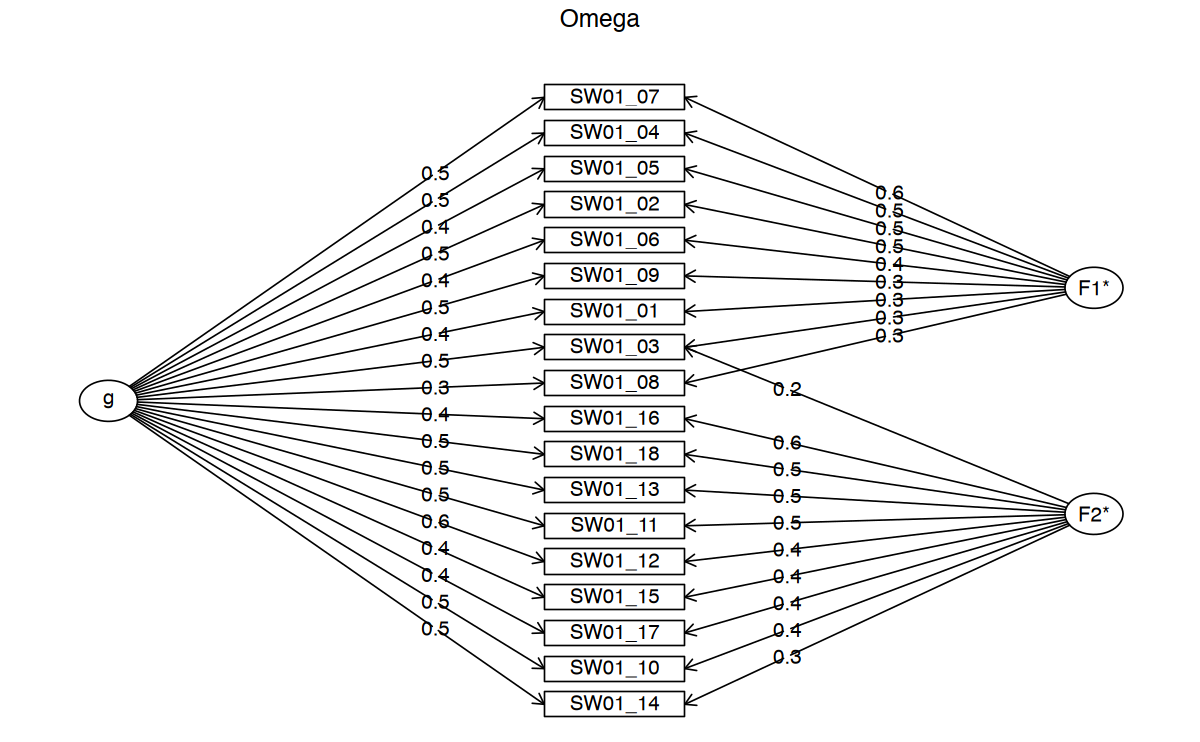

In [25]:
psych::omega(data[SWAN_vars], nfactors = 2)

In [26]:
# Correlation Matrix
corr.test(data[, c(SW_AD, "SW_AD_mean")]) # 0.53 - 0.77
corr.test(data[, c(SW_HI, "SW_HI_mean")]) # 0.62 - 0.77
corr.test(data[, c(SWAN_vars, "SW_mean")]) # 0.48 - 0.73

Call:corr.test(x = data[, c(SW_AD, "SW_AD_mean")])
Correlation matrix 
           SW01_01 SW01_02 SW01_03 SW01_04 SW01_05 SW01_06 SW01_07 SW01_08
SW01_01       1.00    0.49    0.32    0.31    0.38    0.36    0.32    0.22
SW01_02       0.49    1.00    0.47    0.53    0.38    0.53    0.46    0.41
SW01_03       0.32    0.47    1.00    0.44    0.32    0.31    0.40    0.23
SW01_04       0.31    0.53    0.44    1.00    0.53    0.39    0.54    0.30
SW01_05       0.38    0.38    0.32    0.53    1.00    0.28    0.61    0.20
SW01_06       0.36    0.53    0.31    0.39    0.28    1.00    0.40    0.27
SW01_07       0.32    0.46    0.40    0.54    0.61    0.40    1.00    0.33
SW01_08       0.22    0.41    0.23    0.30    0.20    0.27    0.33    1.00
SW01_09       0.33    0.40    0.41    0.39    0.34    0.28    0.48    0.29
SW_AD_mean    0.61    0.77    0.64    0.74    0.68    0.63    0.75    0.53
           SW01_09 SW_AD_mean
SW01_01       0.33       0.61
SW01_02       0.40       0.77
SW01_03       

Call:corr.test(x = data[, c(SW_HI, "SW_HI_mean")])
Correlation matrix 
           SW01_10 SW01_11 SW01_12 SW01_13 SW01_14 SW01_15 SW01_16 SW01_17
SW01_10       1.00    0.49    0.58    0.42    0.44    0.30    0.33    0.34
SW01_11       0.49    1.00    0.61    0.61    0.40    0.30    0.42    0.47
SW01_12       0.58    0.61    1.00    0.55    0.50    0.34    0.39    0.41
SW01_13       0.42    0.61    0.55    1.00    0.37    0.38    0.48    0.37
SW01_14       0.44    0.40    0.50    0.37    1.00    0.32    0.32    0.36
SW01_15       0.30    0.30    0.34    0.38    0.32    1.00    0.50    0.32
SW01_16       0.33    0.42    0.39    0.48    0.32    0.50    1.00    0.46
SW01_17       0.34    0.47    0.41    0.37    0.36    0.32    0.46    1.00
SW01_18       0.44    0.38    0.49    0.51    0.37    0.44    0.49    0.47
SW_HI_mean    0.69    0.73    0.77    0.74    0.66    0.62    0.70    0.66
           SW01_18 SW_HI_mean
SW01_10       0.44       0.69
SW01_11       0.38       0.73
SW01_12       

Call:corr.test(x = data[, c(SWAN_vars, "SW_mean")])
Correlation matrix 
        SW01_01 SW01_02 SW01_03 SW01_04 SW01_05 SW01_06 SW01_07 SW01_08
SW01_01    1.00    0.49    0.32    0.31    0.38    0.36    0.32    0.22
SW01_02    0.49    1.00    0.47    0.53    0.38    0.53    0.46    0.41
SW01_03    0.32    0.47    1.00    0.44    0.32    0.31    0.40    0.23
SW01_04    0.31    0.53    0.44    1.00    0.53    0.39    0.54    0.30
SW01_05    0.38    0.38    0.32    0.53    1.00    0.28    0.61    0.20
SW01_06    0.36    0.53    0.31    0.39    0.28    1.00    0.40    0.27
SW01_07    0.32    0.46    0.40    0.54    0.61    0.40    1.00    0.33
SW01_08    0.22    0.41    0.23    0.30    0.20    0.27    0.33    1.00
SW01_09    0.33    0.40    0.41    0.39    0.34    0.28    0.48    0.29
SW01_10    0.34    0.43    0.34    0.38    0.23    0.30    0.29    0.28
SW01_11    0.22    0.35    0.41    0.35    0.21    0.25    0.29    0.19
SW01_12    0.30    0.38    0.38    0.42    0.28    0.35    0.37 

In [29]:
# Model 1: Bifactor Model
# Model specification
swan_model_2 <- "
SW_GF =~ NA*SW01_01 + SW01_02 + SW01_03 + SW01_04 + SW01_05 + SW01_06 + SW01_07 +
    SW01_08 + SW01_09 + SW01_10 + SW01_11 + SW01_12 + SW01_13 + SW01_14 + SW01_15 +
    SW01_16 + SW01_17 + SW01_18;
SW_AD =~ NA*SW01_01 + SW01_02 + SW01_03 + SW01_04 + SW01_05 + SW01_06 + SW01_07 +
    SW01_08 + SW01_09; SW_HI =~ NA*SW01_10 + SW01_11 + SW01_12 + SW01_13 + SW01_14 +
    SW01_15 + SW01_16 + SW01_17 + SW01_18;
SW_GF ~~ 1*SW_GF; SW_AD ~~ 1*SW_AD; SW_HI ~~ 1*SW_HI; SW_GF ~~ 0*SW_AD;
SW_AD ~~ 0*SW_HI; SW_HI ~~ 0*SW_GF
"

In [30]:
# Model calculation
swan_m2_cfa <- cfa(swan_model_2,
    data = data,
    std.lv = TRUE,
    missing = "fiml",
    estimator = "MLR"
)
# Summary
summary(swan_m2_cfa, standardized = TRUE, fit = TRUE) |> print()

lavaan 0.6-19 ended normally after 66 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        72

  Number of observations                           398
  Number of missing patterns                         2

Model Test User Model:
                                              Standard      Scaled
  Test Statistic                               352.858     289.028
  Degrees of freedom                               117         117
  P-value (Chi-square)                           0.000       0.000
  Scaling correction factor                                  1.221
    Yuan-Bentler correction (Mplus variant)                       

Model Test Baseline Model:

  Test statistic                              2928.538    2257.491
  Degrees of freedom                               153         153
  P-value                                        0.000       0.000
  Scaling correcti

In [32]:
mi <- modindices(swan_m2_cfa, minimum.value = 10, sort = TRUE)
print(mi)

        lhs op     rhs   mi    epc sepc.lv sepc.all sepc.nox
120 SW01_02 ~~ SW01_06 28.3  0.326   0.326    0.297    0.297
163 SW01_05 ~~ SW01_07 26.2  0.401   0.401    0.460    0.460
226 SW01_11 ~~ SW01_13 24.3  0.252   0.252    0.293    0.293
231 SW01_11 ~~ SW01_18 17.9 -0.227  -0.227   -0.251   -0.251
113 SW01_01 ~~ SW01_15 17.9  0.288   0.288    0.232    0.232
100 SW01_01 ~~ SW01_02 17.8  0.242   0.242    0.235    0.235
119 SW01_02 ~~ SW01_05 15.5 -0.258  -0.258   -0.263   -0.263
121 SW01_02 ~~ SW01_07 13.8 -0.198  -0.198   -0.256   -0.256
126 SW01_02 ~~ SW01_12 12.6 -0.159  -0.159   -0.228   -0.228
88    SW_AD =~ SW01_16 12.0 -0.261  -0.261   -0.185   -0.185
162 SW01_05 ~~ SW01_06 11.8 -0.265  -0.265   -0.213   -0.213
94    SW_HI =~ SW01_04 10.6 -0.235  -0.235   -0.162   -0.162
105 SW01_01 ~~ SW01_07 10.3 -0.187  -0.187   -0.203   -0.203
203 SW01_08 ~~ SW01_14 10.2  0.246   0.246    0.169    0.169


In [33]:
# Model 2: Bifactor Model with Modification Items 5&7 and 2&6
# Model specification
swan_model_3 <- "
    SW_GF =~ NA*SW01_01 + SW01_02 + SW01_03 + SW01_04 + SW01_05 + SW01_06 + 
        SW01_07 + SW01_08 + SW01_09 + SW01_10 + SW01_11 + SW01_12 + SW01_13 + 
        SW01_14 + SW01_15 + SW01_16 + SW01_17 + SW01_18; 
    SW_AD =~ NA*SW01_01 + SW01_02 + SW01_03 + SW01_04 + SW01_05 + SW01_06 + 
        SW01_07 + SW01_08 + SW01_09; 
    SW_HI =~ NA*SW01_10 + SW01_11 + SW01_12 + SW01_13 + SW01_14 + SW01_15 + 
        SW01_16 + SW01_17 + SW01_18; SW_GF ~~ 1*SW_GF; 
    SW_AD ~~ 1*SW_AD; 
    SW_HI ~~ 1*SW_HI; 
    SW_GF ~~ 0*SW_AD; 
    SW_AD ~~ 0*SW_HI; 
    SW_HI ~~ 0*SW_GF; 
    SW01_05 ~~ SW01_07; 
    SW01_02 ~~ SW01_06
"

In [42]:
# Model calculation
swan_m3_cfa <- cfa(swan_model_3,
    data = data,
    std.lv = TRUE,
    missing = "fiml",
    estimator = "MLR"
)

# Summary
s <- summary(swan_m3_cfa, standardized = TRUE, fit = TRUE) # standardised factor loading is std.all
s |> print()

lavaan 0.6-19 ended normally after 63 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        74

  Number of observations                           398
  Number of missing patterns                         2

Model Test User Model:
                                              Standard      Scaled
  Test Statistic                               308.602     248.615
  Degrees of freedom                               115         115
  P-value (Chi-square)                           0.000       0.000
  Scaling correction factor                                  1.241
    Yuan-Bentler correction (Mplus variant)                       

Model Test Baseline Model:

  Test statistic                              2928.538    2257.491
  Degrees of freedom                               153         153
  P-value                                        0.000       0.000
  Scaling correcti

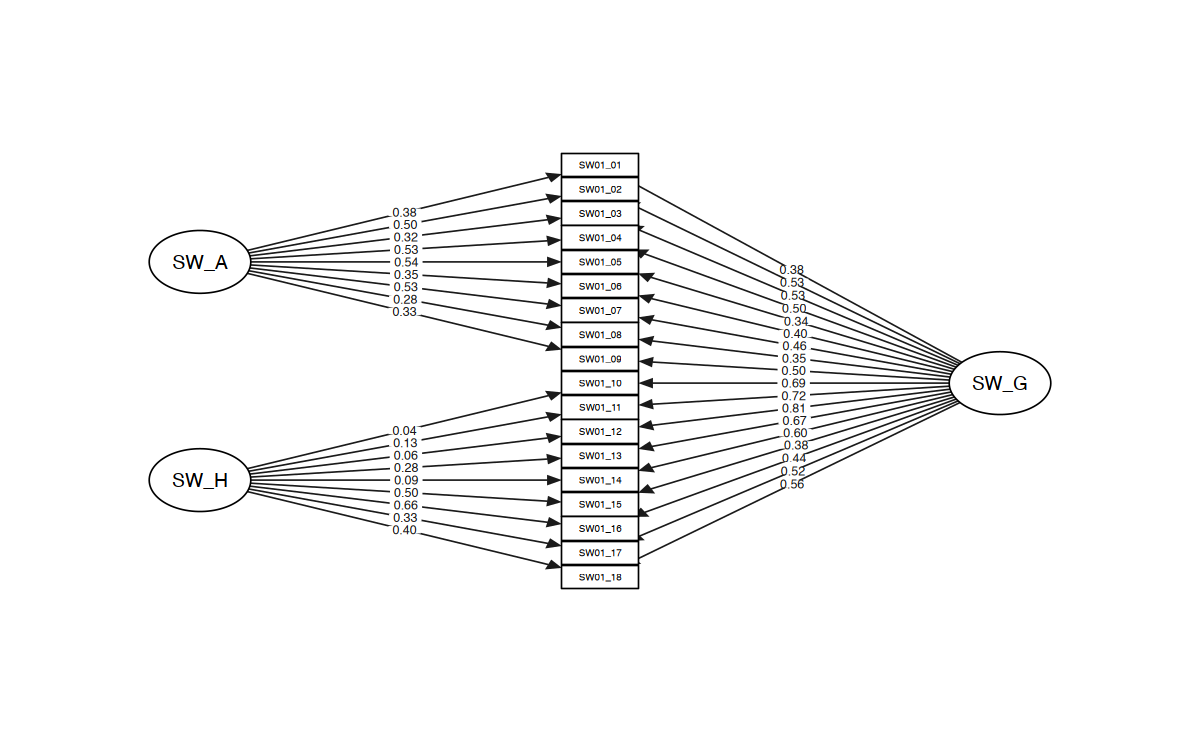

In [ ]:
# Figure Structural Model (Model 3)
m <- matrix(nrow = 18, ncol = 3)
m[, 1] <- c(rep(0, 4), "SW_A", rep(0, 8), "SW_H", rep(0, 4))
m[, 2] <- c(SWAN_vars)
m[, 3] <- c(rep(0, 9), "SW_G", rep(0, 8))

str_model <- semPaths(swan_m3_cfa,
    layout = m,
    intercepts = FALSE,
    what = "std",
    style = "lisrel",
    edge.color = "grey10",
    fade = FALSE,
    edge.label.cex = 0.6,
    sizeMan = 6,
    sizeInt = 5,
    sizeLat = 8,
    sizeMan2 = 3,
    esize = 1,
    residuals = FALSE,
    curvePivot = FALSE
)